# Crop Yield Predictor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [3]:
yield_ = pd.read_csv('yield_Dataset/yield.csv')
temp = pd.read_csv('yield_Dataset/temp.csv')
rainfall = pd.read_csv('yield_Dataset/rainfall.csv')
pesticides = pd.read_csv('yield_Dataset/pesticides.csv')
yield_df = pd.read_csv('yield_Dataset/yield_df.csv')

In [4]:
selected_columns = ['Area','Item','Year','Value']

In [5]:
yield_ = yield_[selected_columns]

In [6]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [7]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [8]:
temp.rename(columns = {'year':'Year','country':'Area'}, inplace = True)

In [9]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [10]:
pesticides.head(5)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [11]:
selected_columns = ['Area','Year','Value']
pesticides  = pesticides[selected_columns]

In [12]:
#shape of the data
print("Shape of the yield dataset: ",yield_.shape)
print("Shape of the temp dataset: ",temp.shape)
print("Shape of the rainfall dataset: ",rainfall.shape)
print("Shape of the pesticides dataset: ",pesticides.shape)

Shape of the yield dataset:  (56717, 4)
Shape of the temp dataset:  (71311, 3)
Shape of the rainfall dataset:  (6727, 3)
Shape of the pesticides dataset:  (4349, 3)


In [13]:
temp = temp[temp['Year'] >= 1961]
final_yield = pd.merge(yield_,temp,on=["Area","Year"])

In [14]:
final_yield.head()

,Area,Item,Year,Value,avg_temp
0,Afghanistan,Maize,1961,14000,14.23
1,Afghanistan,Potatoes,1961,86667,14.23
2,Afghanistan,"Rice, paddy",1961,15190,14.23
3,Afghanistan,Wheat,1961,10220,14.23
4,Afghanistan,Maize,1962,14000,14.10


In [15]:
final_yield = pd.merge(final_yield,pesticides,on=['Year','Area'])
final_yield.head()

,Area,Item,Year,Value_x,avg_temp,Value_y
0,Albania,Maize,1990,36613,16.37,121.0
1,Albania,Potatoes,1990,66667,16.37,121.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0
3,Albania,Sorghum,1990,12500,16.37,121.0
4,Albania,Soybeans,1990,7000,16.37,121.0


In [16]:
final_yield.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)

In [17]:
final_yield.head()

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value
0,Albania,Maize,1990,36613,16.37,121.0
1,Albania,Potatoes,1990,66667,16.37,121.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0
3,Albania,Sorghum,1990,12500,16.37,121.0
4,Albania,Soybeans,1990,7000,16.37,121.0


In [18]:
rainfall.rename(columns = {' Area':'Area'}, inplace = True)
final_yield = pd.merge(final_yield,rainfall,on=['Year','Area'])
final_yield.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)


In [19]:
final_yield.head()

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485
1,Albania,Potatoes,1990,66667,16.37,121.0,1485
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485
3,Albania,Sorghum,1990,12500,16.37,121.0,1485
4,Albania,Soybeans,1990,7000,16.37,121.0,1485


In [20]:
Canada_final_yield = final_yield[final_yield['Area'] == 'Canada']

In [21]:
Canada_final_yield.head()

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
5584,Canada,Maize,1990,68602,8.20,29568.0,537
5585,Canada,Maize,1990,68602,9.48,29568.0,537
5586,Canada,Maize,1990,68602,6.07,29568.0,537
5587,Canada,Maize,1990,68602,5.57,29568.0,537
5588,Canada,Maize,1990,68602,7.41,29568.0,537


In [22]:
Canada_final_yield.shape

(552, 7)

In [23]:
Canada_final_yield["average_rain"] = pd.to_numeric(final_yield["average_rain"], errors='coerce')

/var/folders/fl/hf7lhjbs5j94v2q52qhj06k80000gn/T/ipykernel_21521/4230618947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_final_yield["average_rain"] = pd.to_numeric(final_yield["average_rain"], errors='coerce')


In [24]:
Canada_final_yield=Canada_final_yield.dropna()
Canada_final_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 5584 to 6135
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              552 non-null    object 
 1   Item              552 non-null    object 
 2   Year              552 non-null    int64  
 3   Yield_Value       552 non-null    int64  
 4   avg_temp          552 non-null    float64
 5   Pesticides_Value  552 non-null    float64
 6   average_rain      552 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 34.5+ KB


In [25]:
Canada_final_yield.head()

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
5584,Canada,Maize,1990,68602,8.20,29568.0,537.0
5585,Canada,Maize,1990,68602,9.48,29568.0,537.0
5586,Canada,Maize,1990,68602,6.07,29568.0,537.0
5587,Canada,Maize,1990,68602,5.57,29568.0,537.0
5588,Canada,Maize,1990,68602,7.41,29568.0,537.0


In [26]:
Canada_final_yield.describe()

,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
count,552.000000,552.000000,552.000000,552.000000,552.0
mean,2001.434783,62874.858696,7.191884,43102.233913,537.0
std,7.070253,43611.515875,1.549169,14367.963077,0.0
min,1990.000000,15298.000000,3.690000,29206.000000,537.0
25%,1995.000000,25963.000000,6.010000,32223.400000,537.0
50%,2001.000000,46435.000000,7.300000,38258.200000,537.0
75%,2008.000000,96824.000000,8.330000,53707.300000,537.0
max,2013.000000,250994.000000,10.600000,81659.800000,537.0


In [27]:
Canada_final_yield=Canada_final_yield.drop('Year',axis=1)

In [28]:
Canada_final_yield['Item'].value_counts()

Item
Maize       138
Potatoes    138
Soybeans    138
Wheat       138
Name: count, dtype: int64

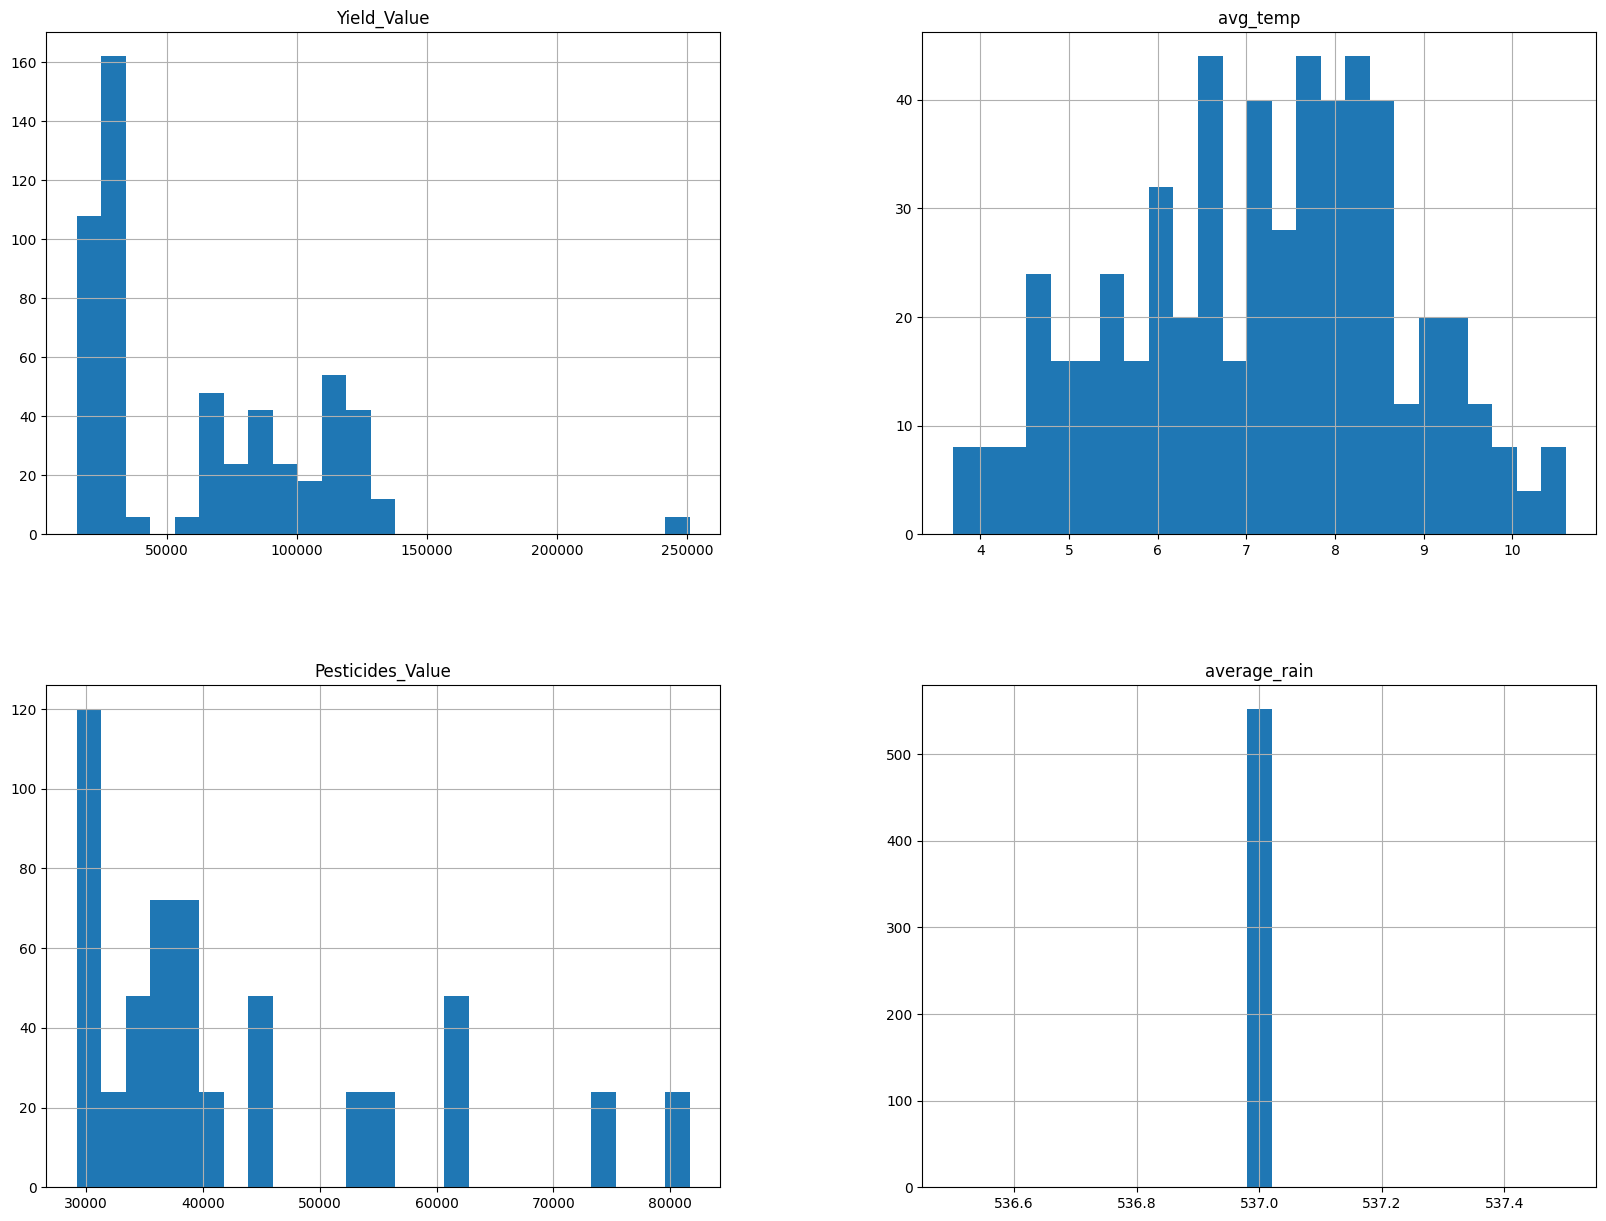

In [29]:
Canada_final_yield.hist(bins = 25,figsize=(20,15));

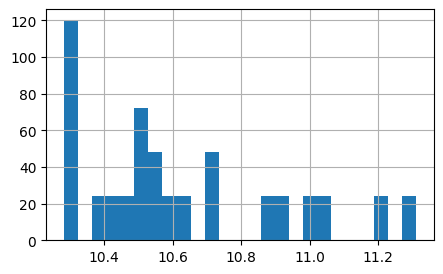

In [30]:
Canada_final_yield['Pesticides_log']= np.log(Canada_final_yield['Pesticides_Value'])
Canada_final_yield['Pesticides_log'].hist(bins = 25,figsize=(5,3));

In [31]:
Canada_final_yield["Yield_Value_Cat"] = pd.cut(Canada_final_yield["Yield_Value"],
 bins=[0.,30000, 100000,250000, 350000.,np.inf],
 labels=[1, 2, 3, 4, 5])

In [32]:
Canada_final_yield.head()

,Area,Item,Yield_Value,avg_temp,Pesticides_Value,average_rain,Pesticides_log,Yield_Value_Cat
5584,Canada,Maize,68602,8.20,29568.0,537.0,10.294448,2
5585,Canada,Maize,68602,9.48,29568.0,537.0,10.294448,2
5586,Canada,Maize,68602,6.07,29568.0,537.0,10.294448,2
5587,Canada,Maize,68602,5.57,29568.0,537.0,10.294448,2
5588,Canada,Maize,68602,7.41,29568.0,537.0,10.294448,2


In [33]:
Canada_final_yield["Yield_Value_Cat"].value_counts()

Yield_Value_Cat
1    264
2    156
3    126
4      6
5      0
Name: count, dtype: int64

In [34]:
Canada_final_yield.drop(['Yield_Value','Area'],axis=1,inplace=True)

In [35]:
Canada_final_yield.head()

,Item,avg_temp,Pesticides_Value,average_rain,Pesticides_log,Yield_Value_Cat
5584,Maize,8.20,29568.0,537.0,10.294448,2
5585,Maize,9.48,29568.0,537.0,10.294448,2
5586,Maize,6.07,29568.0,537.0,10.294448,2
5587,Maize,5.57,29568.0,537.0,10.294448,2
5588,Maize,7.41,29568.0,537.0,10.294448,2


In [36]:
le = LabelEncoder()
Canada_final_yield['Item'] = le.fit_transform(Canada_final_yield['Item'])

In [37]:
Canada_final_yield.head()

,Item,avg_temp,Pesticides_Value,average_rain,Pesticides_log,Yield_Value_Cat
5584,0,8.20,29568.0,537.0,10.294448,2
5585,0,9.48,29568.0,537.0,10.294448,2
5586,0,6.07,29568.0,537.0,10.294448,2
5587,0,5.57,29568.0,537.0,10.294448,2
5588,0,7.41,29568.0,537.0,10.294448,2


In [38]:
X = Canada_final_yield.drop("Yield_Value_Cat", axis=1)
Y = Canada_final_yield["Yield_Value_Cat"]

In [39]:
X

,Item,avg_temp,Pesticides_Value,average_rain,Pesticides_log
5584,0,8.20,29568.0,537.0,10.294448
5585,0,9.48,29568.0,537.0,10.294448
5586,0,6.07,29568.0,537.0,10.294448
5587,0,5.57,29568.0,537.0,10.294448
5588,0,7.41,29568.0,537.0,10.294448
...,...,...,...,...,...
6131,3,10.11,81659.8,537.0,11.310317
6132,3,7.86,81659.8,537.0,11.310317
6133,3,7.08,81659.8,537.0,11.310317
6134,3,8.46,81659.8,537.0,11.310317


In [40]:
Y

5584    2
5585    2
5586    2
5587    2
5588    2
       ..
6131    2
6132    2
6133    2
6134    2
6135    2
Name: Yield_Value_Cat, Length: 552, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.1,random_state=1812)

In [42]:
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)

In [43]:
X_test_sc = std_scaler.transform(X_test)

The accuracy of the Linear Regression Model Train is 42.17
The accuracy of the  Linear Regression Model Test is 43.09


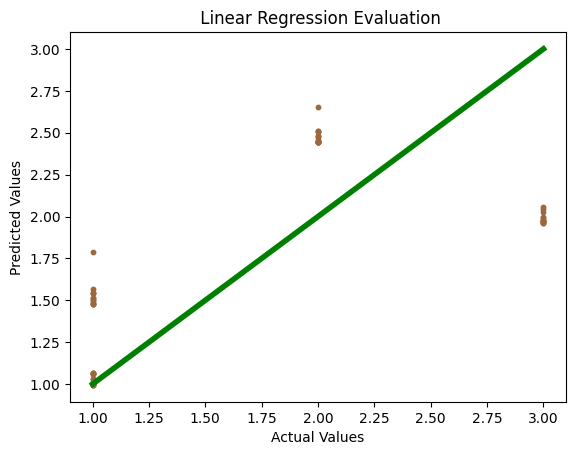

The accuracy of the Random Forest Model Train is 99.84
The accuracy of the  Random Forest Model Test is 99.46


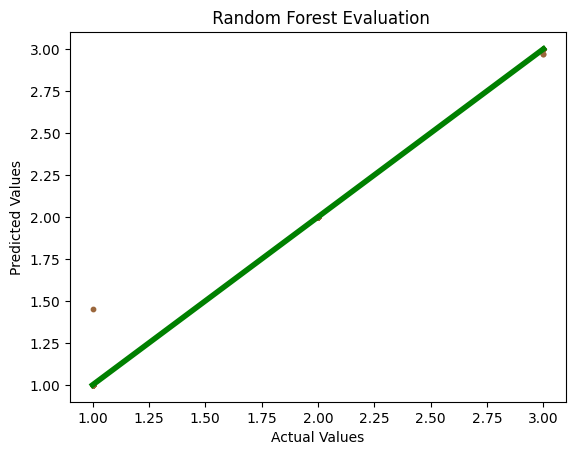

The accuracy of the Gradient Boost Model Train is 99.30
The accuracy of the  Gradient Boost Model Test is 99.75


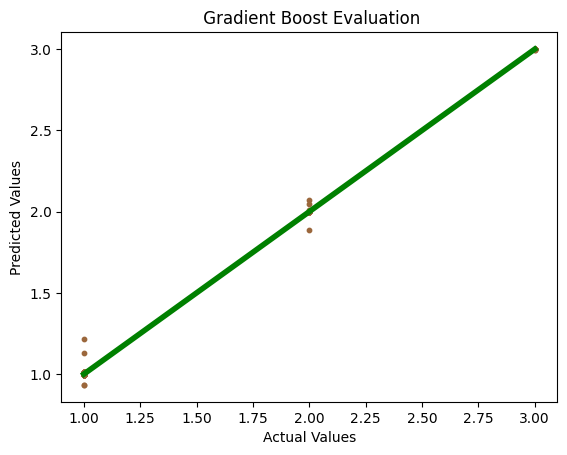

The accuracy of the XGBoost Model Train is 99.71
The accuracy of the  XGBoost Model Test is 97.39


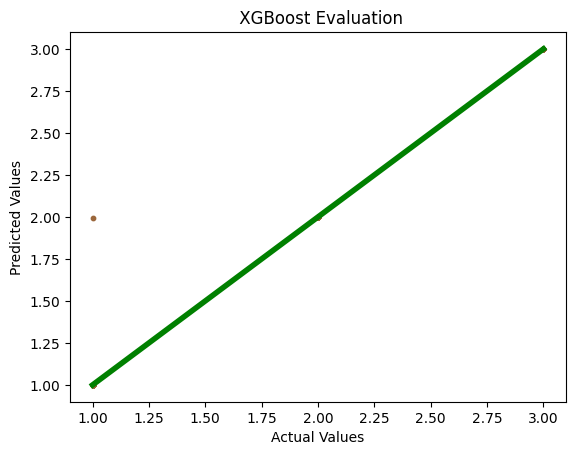

The accuracy of the KNN Model Train is 94.83
The accuracy of the  KNN Model Test is 98.95


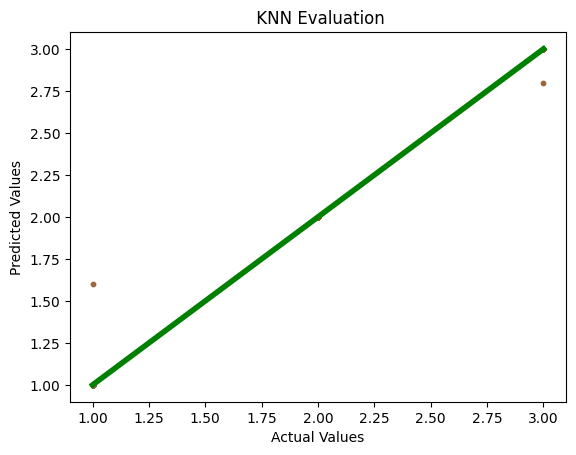

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.37


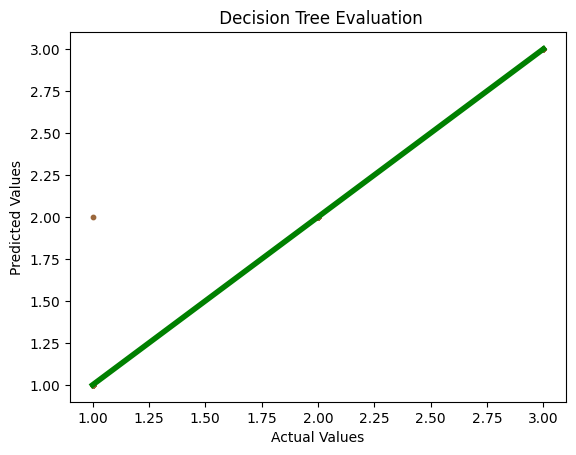

The accuracy of the Bagging Regressor Model Train is 99.85
The accuracy of the  Bagging Regressor Model Test is 99.52


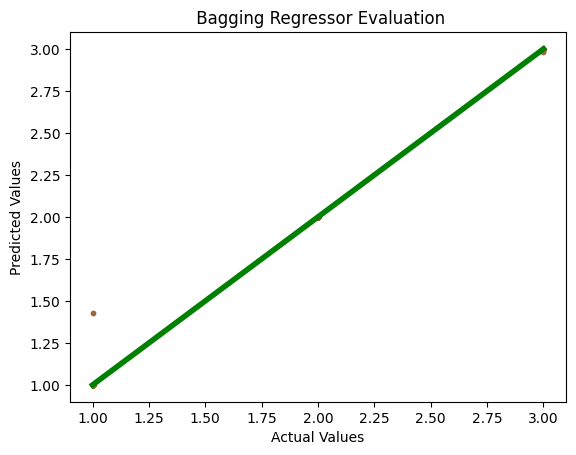

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.430936,0.385969,0.430936
1,Random Forest,0.994621,0.003648,0.994621
2,Gradient Boost,0.997538,0.001670,0.997538
3,XGBoost,0.973860,0.017730,0.973860
4,KNN,0.989469,0.007143,0.989469
5,Decision Tree,0.973672,0.017857,0.973672
6,Bagging Regressor,0.995192,0.003261,0.995192


In [44]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=1812)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=1812)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=1812)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=1812))
          ]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train_sc , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test_sc , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

In [45]:
import joblib
name = 'GBR'
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = model.score(X_test_sc, y_test)
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)
results.append((name, accuracy, MSE, R2_score))

model_filename = "Canada_GBR.pkl"
joblib.dump(model, model_filename)


['Canada_GBR.pkl']

In [ ]:
import joblib
name = 'DTC'
model = DecisionTreeRegressor(random_state=1812)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = model.score(X_test_sc, y_test)
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)
results.append((name, accuracy, MSE, R2_score))

model_filename = "Canada_DTC.pkl"
joblib.dump(model, model_filename)


In [48]:
Y.to_csv('Canada_Y.csv',sep='\t')

In [49]:
X.to_csv('Canada_X2.csv',sep='\t')